### Repositório do Projeto

O código-fonte completo deste projeto está disponível no GitHub no link abaixo: Caso as imagens do ambiente não apareça, favor acessar no repositório:

[Repositório no GitHub](https://github.com/ronaldobresende/country_data-clustering/blob/main/notebooks/clustering_validation.ipynb)

Ronaldo Barbosa Resende

'As imagens abaixo mostram o ambiente de desenvolvimento configurado e o arquivo requirements.txt: '


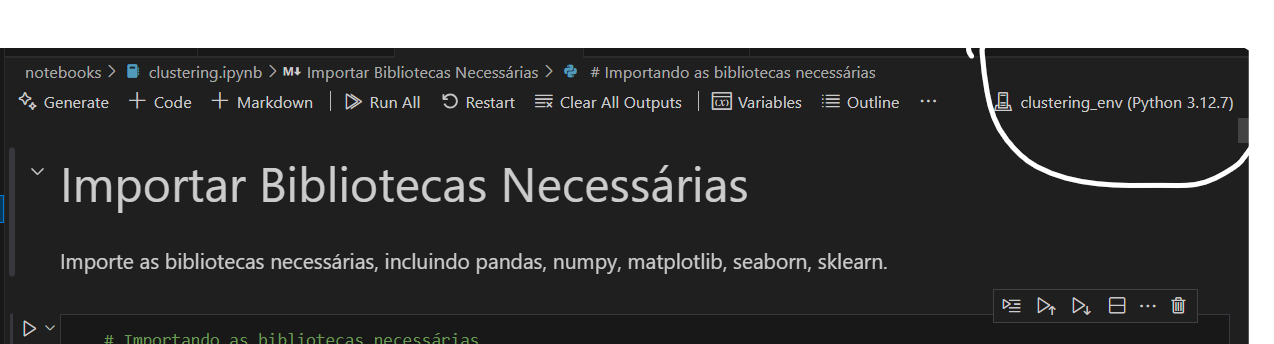


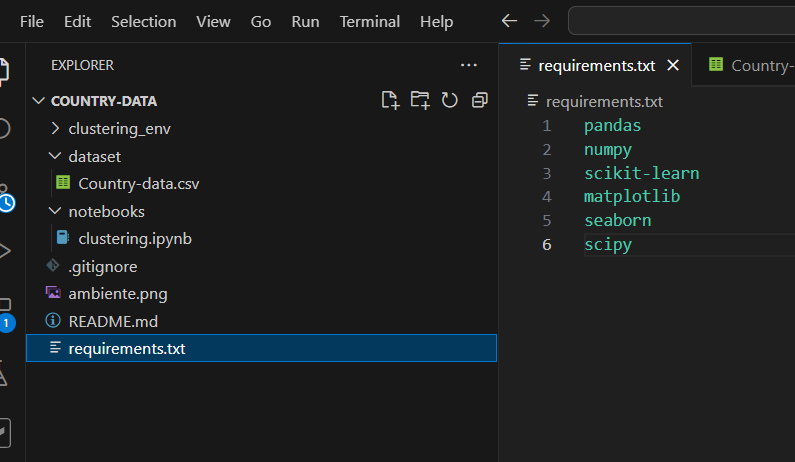

In [1]:
import base64
from IPython.display import HTML

# Caminho para a imagem
image_path = "..\\ambiente.png"

display("As imagens abaixo mostram o ambiente de desenvolvimento configurado e o arquivo requirements.txt: ")

# Converter a imagem para Base64
with open(image_path, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

# Exibir a imagem no notebook
display(HTML(f'<img src="data:image/png;base64,{encoded_string}" alt="Descrição da Imagem" width="1274" height="344">'))

# Converter a imagem para Base64
with open("..\\requirements.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

# Exibir a imagem no notebook
HTML(f'<img src="data:image/png;base64,{encoded_string}" alt="Descrição da Imagem" width="1274" height="344">')



In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score


# Configurando o estilo dos gráficos
sns.set_style("whitegrid")

[Country Data](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)

### Justificativa para a Escolha dos Dados

**Objetivo**:
Categorizar os países utilizando fatores socioeconômicos e de saúde que determinam o desenvolvimento geral do país.

**Motivação**:
A HELP International arrecadou 10 milhões de dólares e precisa decidir como usar esse dinheiro de forma estratégica e eficaz. O objetivo é identificar os países que mais necessitam de ajuda humanitária.

**Justificativa**:
Os dados foram escolhidos para avaliar indicadores críticos como mortalidade infantil, exportações, gastos com saúde, importações, renda, inflação, expectativa de vida, taxa de fertilidade e PIB per capita. Esses fatores são essenciais para determinar o nível de desenvolvimento e as necessidades de cada país. A análise permitirá priorizar os países em situação mais crítica, ajudando a ONG a alocar recursos de forma eficiente e maximizar o impacto de suas ações humanitárias.

### Primeiras Linhas do Dataset


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Estatísticas Descritivas do Dataset


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Verificação de Valores Ausentes


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Número de linhas duplicadas: 0
### Distribuição das Variáveis Numéricas


<Figure size 1500x1000 with 0 Axes>

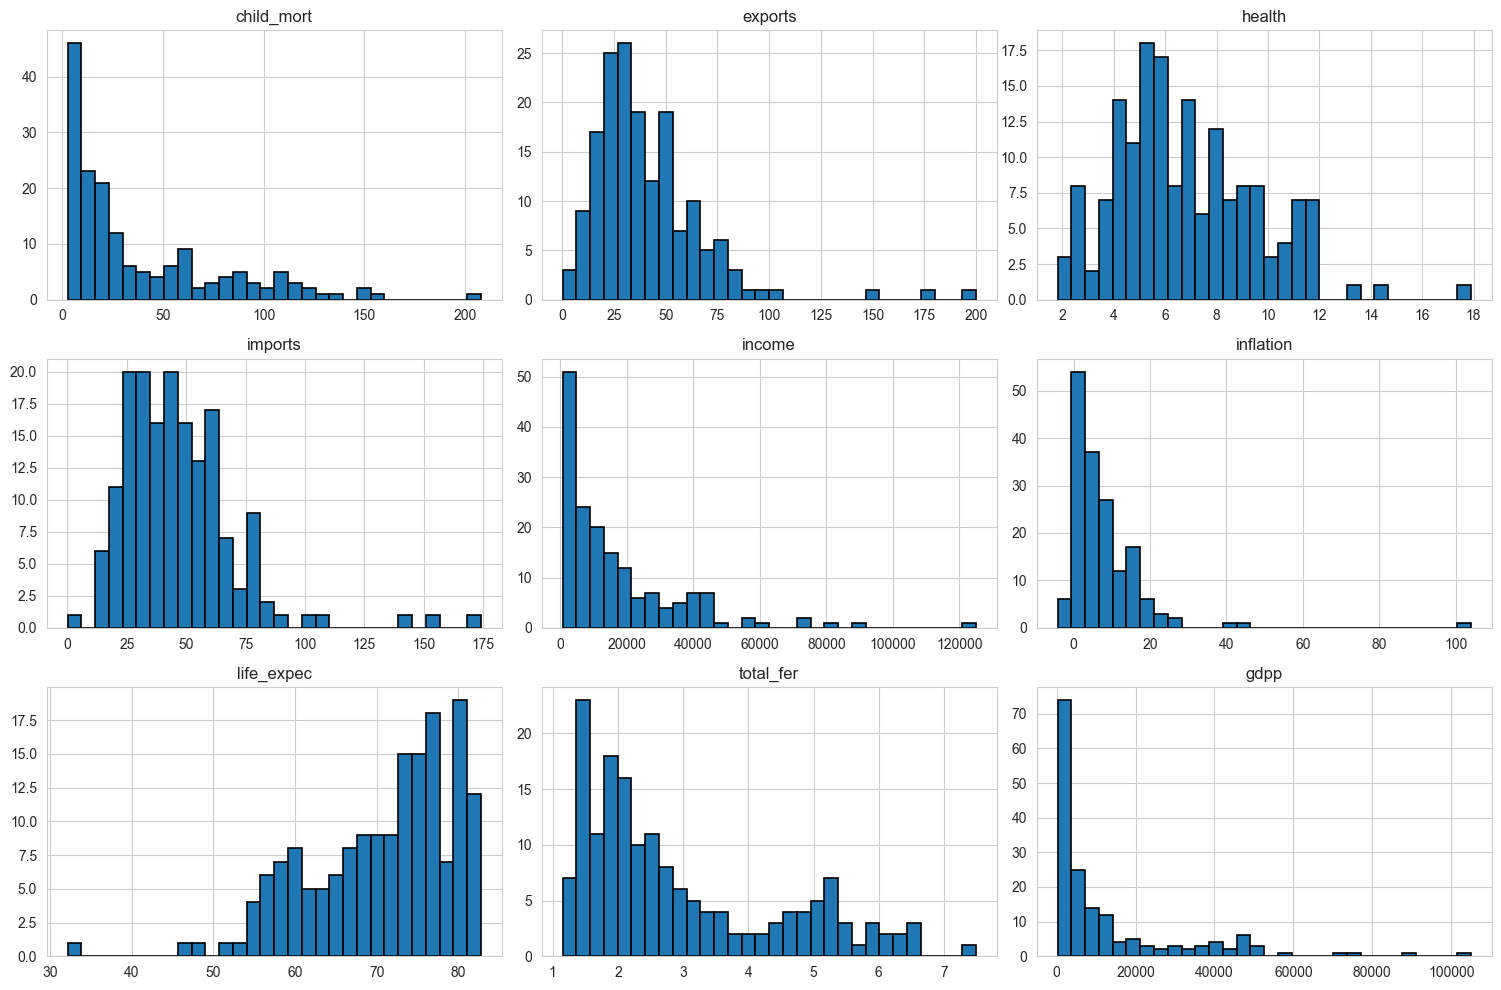

In [3]:
# Análise Exploratória dos Dados

df = pd.read_csv('..\\dataset\\Country-data.csv')
#https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

print("### Primeiras Linhas do Dataset")
display(df.head())

print("### Estatísticas Descritivas do Dataset")
display(df.describe())

print("### Verificação de Valores Ausentes")
display(df.isnull().sum())

duplicatas = df.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicatas}")

# Visualizando a distribuição das variáveis numéricas
print("### Distribuição das Variáveis Numéricas")
plt.figure(figsize=(15, 10))
df.hist(bins=30, edgecolor='black', linewidth=1.2, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Análise Exploratória dos Dados

1. **Primeiras Linhas do Dataset**: A tabela acima mostra as primeiras linhas do dataset, permitindo uma visão inicial dos dados.
2. **Estatísticas Descritivas**: As estatísticas descritivas fornecem uma visão geral das distribuições das variáveis numéricas, incluindo média, desvio padrão, valores mínimos e máximos.
3. **Valores Ausentes**: A verificação de valores ausentes mostra que não há valores ausentes no dataset.
4. **Verificação de Duplicatas**: A verificação de duplicatas mostra o número de linhas duplicadas no dataset.
5. **Distribuição das Variáveis**: Os histogramas acima mostram a distribuição das variáveis numéricas no dataset.

### Dados Preparados para Clusterização


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


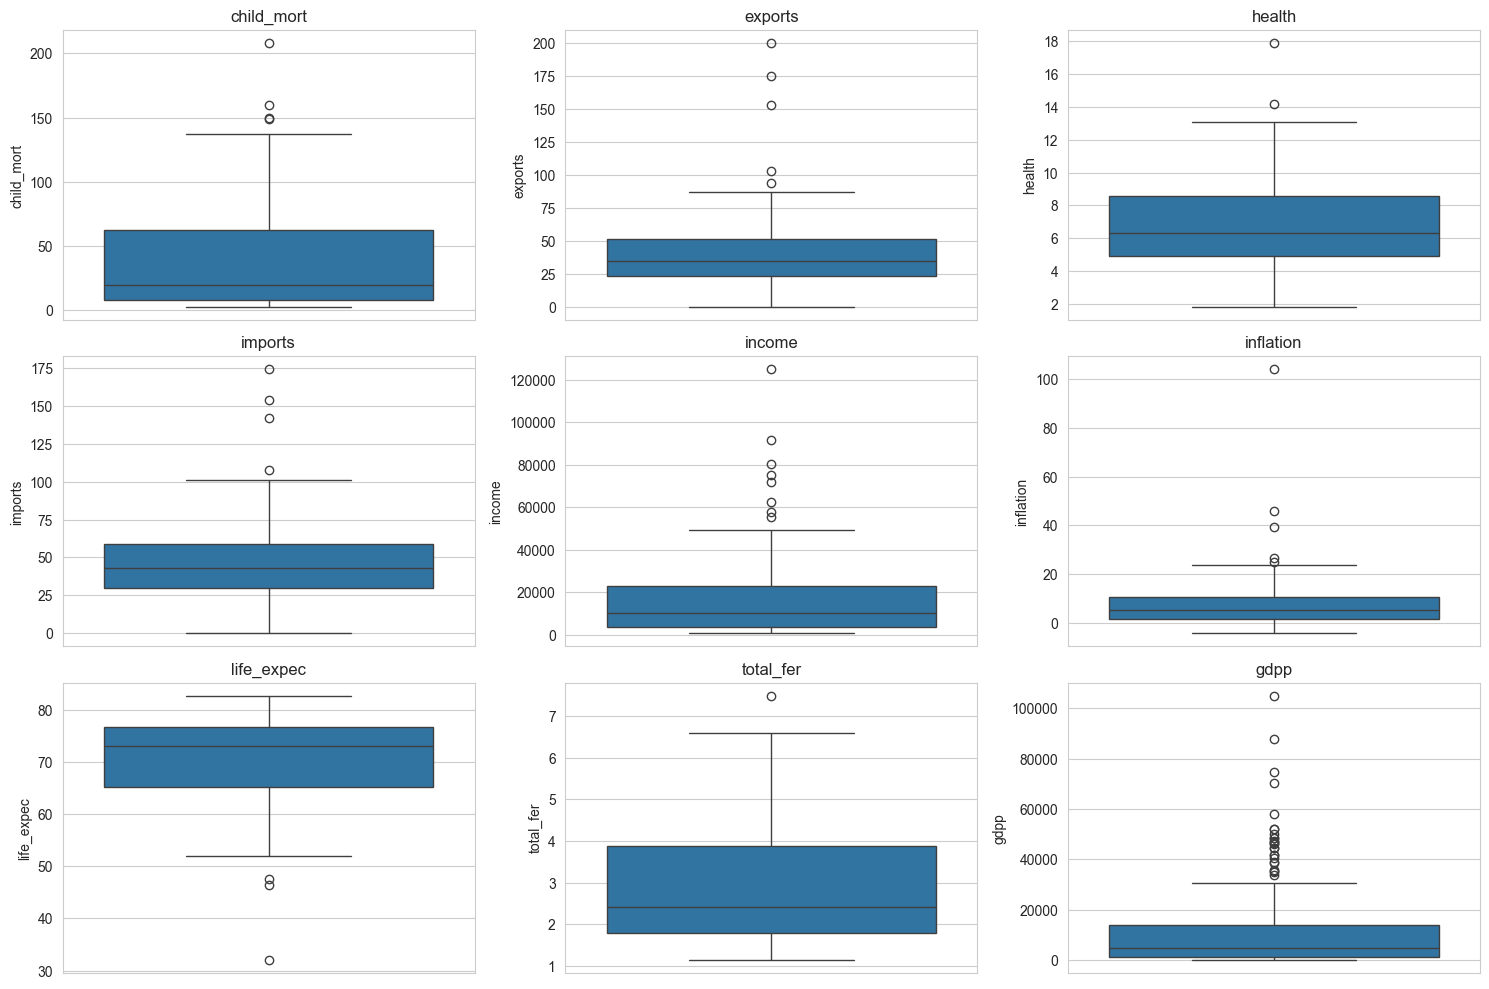

In [4]:
# Preparando os dados para clusterização

variaveis_clusterizacao = df.drop(columns=['country'])
print("### Dados Preparados para Clusterização")
display(variaveis_clusterizacao.head())

# Visualizando a faixa dinâmica das variáveis selecionadas
plt.figure(figsize=(15, 10))
for i, coluna in enumerate(variaveis_clusterizacao, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[coluna])
    plt.title(coluna)
plt.tight_layout()
plt.show()


### Faixa Dinâmica das Variáveis

Os gráficos acima mostram a faixa dinâmica das variáveis selecionadas para a clusterização. Cada boxplot representa a distribuição de uma variável, destacando os valores mínimos, máximos, medianos e possíveis outliers.

**Análise dos Resultados**:
1. **child_mort**: A taxa de mortalidade infantil varia significativamente entre os países, com alguns países apresentando valores extremamente altos.
2. **exports**: A porcentagem de exportações em relação ao PIB também varia amplamente, com alguns países altamente dependentes de exportações.
3. **health**: O gasto com saúde como porcentagem do PIB mostra uma distribuição mais concentrada, mas ainda com alguns outliers.
4. **imports**: Semelhante às exportações, a porcentagem de importações em relação ao PIB varia bastante.
5. **income**: A renda per capita apresenta uma grande variação, com alguns países muito mais ricos que outros.
6. **inflation**: A inflação tem uma distribuição ampla, com alguns países enfrentando hiperinflação.
7. **life_expec**: A expectativa de vida varia, mas a maioria dos países está em uma faixa mais alta.
8. **total_fer**: A taxa de fertilidade total varia, com alguns países apresentando taxas muito altas.
9. **gdpp**: O PIB per capita também mostra uma grande variação entre os países.

**Conclusão**: Antes de realizar a clusterização, é importante normalizar os dados para garantir que todas as variáveis contribuam igualmente para a formação dos clusters.


In [5]:
# Pré-processamento dos Dados

# Verificando os tipos de dados das colunas
print("### Tipos de Dados das Colunas")
print(df.dtypes)

# Convertendo colunas 'income' e 'gdpp' para float64
df['income'] = df['income'].astype('float64')
df['gdpp'] = df['gdpp'].astype('float64')

# Verificando os tipos de dados das colunas após a conversão
print("### Tipos de Dados das Colunas Após Conversão")
print(df.dtypes)

# Normalizando os dados
scaler = StandardScaler()
df_scaled = df.copy()
variaveis_clusterizacao = df.drop(columns=['country']).columns
df_scaled[variaveis_clusterizacao] = scaler.fit_transform(df[variaveis_clusterizacao])

# Exibindo as primeiras linhas dos dados normalizados
print("### Dados Normalizados")
display(df_scaled.head())


### Tipos de Dados das Colunas
country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object
### Tipos de Dados das Colunas Após Conversão
country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp          float64
dtype: object
### Dados Normalizados


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### Pré-processamento dos Dados

1. **Normalização dos Dados**: Os dados foram normalizados utilizando a técnica de padronização (StandardScaler), que transforma os dados para que tenham média 0 e desvio padrão 1. Isso é importante para garantir que todas as variáveis contribuam igualmente para a formação dos clusters.


# Clusterização com K-Médias

O melhor número de clusters encontrado é: 5 com índice de silhueta: 0.30088229124112015


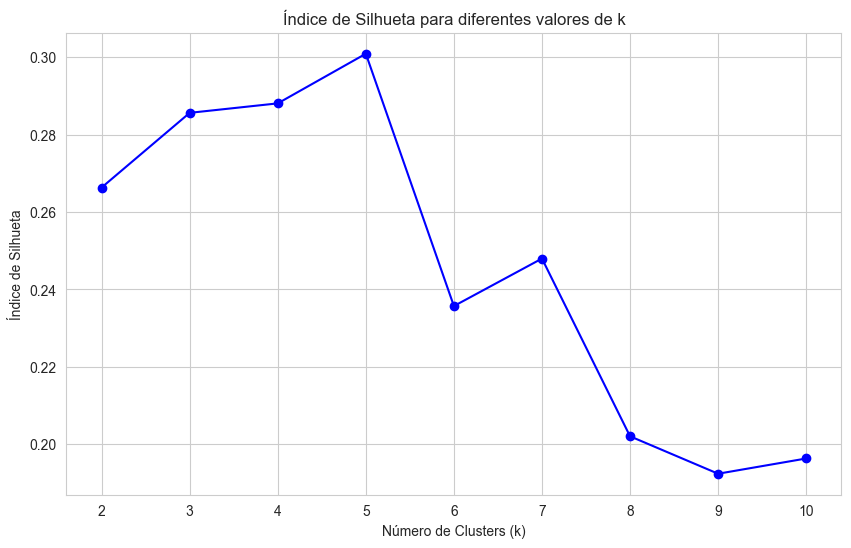

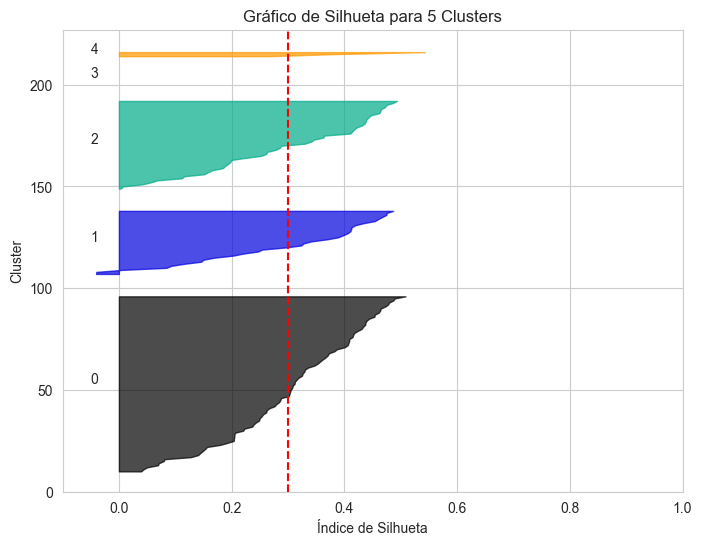

In [6]:
# Determinar o número ótimo de clusters usando o índice de silhueta
X = df_scaled[variaveis_clusterizacao]
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Guardar os índices de silhueta em uma variável para uso futuro
silhouette_scores_variable = silhouette_scores    

# Encontrar o melhor número de clusters
melhor_num_clusters = K[silhouette_scores.index(max(silhouette_scores))]
max_silhouette_kmeans = max(silhouette_scores)

# Aplicar KMeans com o melhor número de clusters
kmeans = KMeans(n_clusters=melhor_num_clusters, random_state=42)
df_scaled['cluster_kmeans'] = kmeans.fit_predict(X)

print(f"O melhor número de clusters encontrado é: {melhor_num_clusters} com índice de silhueta: {max_silhouette_kmeans}")

# Plotar o índice de silhueta para cada valor de k
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silhueta')
plt.title('Índice de Silhueta para diferentes valores de k')
plt.show()

# Calcular os valores de silhueta para cada ponto
sample_silhouette_values = silhouette_samples(df_scaled[variaveis_clusterizacao], df_scaled['cluster_kmeans'])

# Plotar o gráfico de silhueta para o melhor número de clusters
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(df_scaled) + (melhor_num_clusters + 1) * 10])

y_lower = 10
for i in range(melhor_num_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[df_scaled['cluster_kmeans'] == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / melhor_num_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10

ax1.set_title(f"Gráfico de Silhueta para {melhor_num_clusters} Clusters")
ax1.set_xlabel("Índice de Silhueta")
ax1.set_ylabel("Cluster")

ax1.axvline(x=max_silhouette_kmeans, color="red", linestyle="--")

plt.show()



# Clusterização com DBScan

O melhor valor de eps encontrado é: 1.9000000000000001 com índice de silhueta: 0.36605818960049513


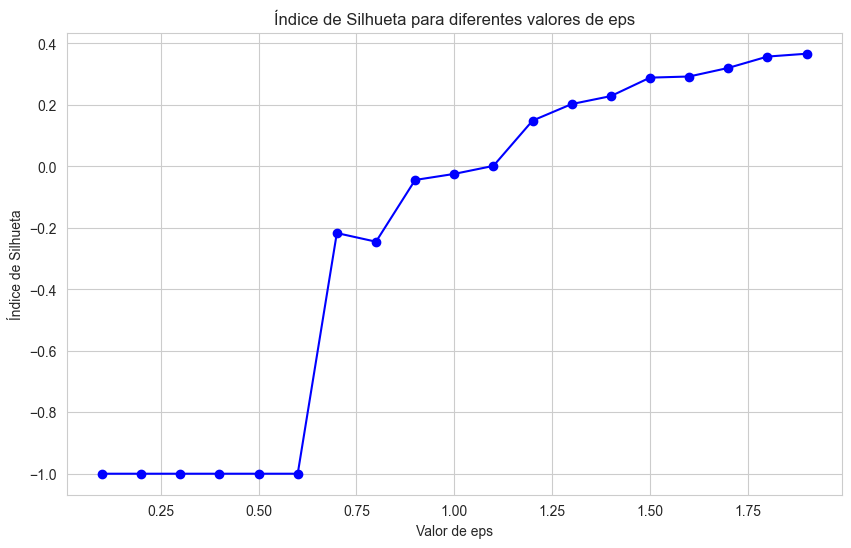

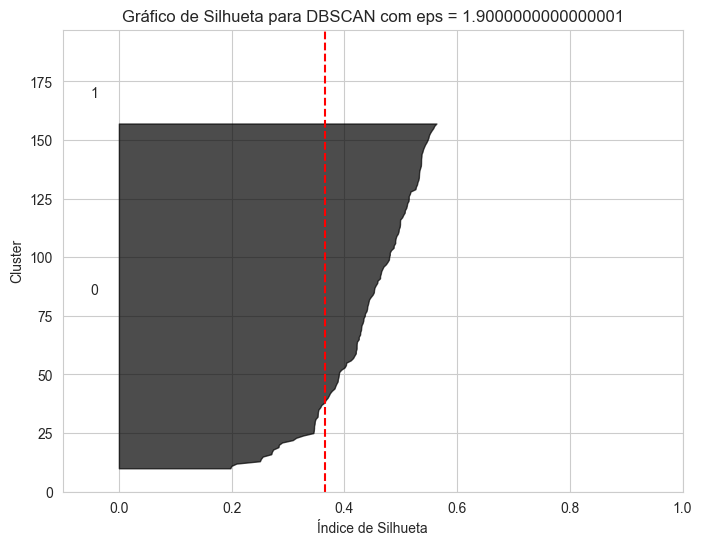

In [7]:
# Lista para armazenar os valores do índice de silhueta
silhouette_scores = []

# Testar diferentes valores de eps
eps_values = np.arange(0.1, 2.0, 0.1)

for eps in eps_values:
    # Aplicar DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=5)
    cluster_labels = dbscan.fit_predict(df_scaled[variaveis_clusterizacao])
    
    # Calcular o índice de silhueta, ignorando clusters com apenas um ponto
    if len(set(cluster_labels)) > 1:
        score = silhouette_score(X, cluster_labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)

# Encontrar o melhor valor de eps
melhor_eps = eps_values[silhouette_scores.index(max(silhouette_scores))]
max_silhouette_dbscan = max(silhouette_scores)
print(f"O melhor valor de eps encontrado é: {melhor_eps} com índice de silhueta: {max_silhouette_dbscan}")

# Plotar o índice de silhueta para cada valor de eps
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores, 'bo-')
plt.xlabel('Valor de eps')
plt.ylabel('Índice de Silhueta')
plt.title('Índice de Silhueta para diferentes valores de eps')
plt.show()

# Aplicar DBSCAN com o melhor valor de eps
dbscan = DBSCAN(eps=melhor_eps, min_samples=5)
df_scaled['cluster_dbscan'] = dbscan.fit_predict(df_scaled[variaveis_clusterizacao])

# Calcular os valores de silhueta para cada ponto
sample_silhouette_values = silhouette_samples(df_scaled[variaveis_clusterizacao], df_scaled['cluster_dbscan'])

# Plotar o gráfico de silhueta para o melhor valor de eps
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(df_scaled) + (len(set(df_scaled['cluster_dbscan'])) + 1) * 10])

y_lower = 10
for i in range(len(set(df_scaled['cluster_dbscan']))):
    ith_cluster_silhouette_values = sample_silhouette_values[df_scaled['cluster_dbscan'] == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / len(set(df_scaled['cluster_dbscan'])))
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10

ax1.set_title(f"Gráfico de Silhueta para DBSCAN com eps = {melhor_eps}")
ax1.set_xlabel("Índice de Silhueta")
ax1.set_ylabel("Cluster")

ax1.axvline(x=max_silhouette_dbscan, color="red", linestyle="--")

plt.show()

### Descrição do Processo de Mensuração do Índice de Silhueta

O índice de silhueta é uma métrica usada para avaliar a qualidade de clusters formados por algoritmos de clusterização. Ele mede o quão bem cada ponto está agrupado em seu próprio cluster em comparação com outros clusters. O índice de silhueta varia de -1 a 1, onde valores próximos a 1 indicam que os pontos estão bem agrupados, valores próximos a 0 indicam que os pontos estão na fronteira entre dois clusters, e valores negativos indicam que os pontos podem estar agrupados no cluster errado.

# Comparação dos Resultados de Clusterização
Compare os resultados dos dois métodos de clusterização, apontando semelhanças e diferenças.

In [8]:
max_silhouette_dbscan, max_silhouette_kmeans



(np.float64(0.36605818960049513), np.float64(0.30088229124112015))

### Comparação dos Resultados de Clusterização

A tabela acima mostra a comparação entre os clusters obtidos pelo K-Médias e pela Clusterização Hierárquica para cada país.

**Semelhanças e Diferenças**:
1. **Semelhanças**: 
- Ambos os métodos de clusterização utilizam o índice de silhueta para avaliar a qualidade dos clusters formados.
- Ambos identificam grupos de dados com características semelhantes.
2. **Diferenças**: 
- **K-Means**: Requer a especificação do número de clusters (`k`) e tende a formar clusters esféricos. Obteve um índice de silhueta de 0.366, indicando uma qualidade de clusterização moderada.
- **DBSCAN**: Não requer a especificação do número de clusters, mas utiliza parâmetros como `eps` e `min_samples`. Pode identificar outliers e formar clusters de formas arbitrárias. Obteve um índice de silhueta de 0.301, indicando uma qualidade de clusterização ligeiramente inferior à do K-Means.

**Interpretação**:
- **K-Means**: Adequado quando o número de clusters é conhecido e os clusters têm formas esféricas. A qualidade de clusterização é moderada, mas não identifica outliers.
- **DBSCAN**: Adequado para dados com clusters de formas arbitrárias e para identificar outliers. A qualidade de clusterização é ligeiramente inferior à do K-Means, mas oferece a vantagem de lidar com outliers e clusters de formas não esféricas.

In [9]:
# Índice de Calinski-Harabasz
calinski_harabasz_kmeans = calinski_harabasz_score(X, df_scaled['cluster_kmeans'])
calinski_harabasz_dbscan = calinski_harabasz_score(X, df_scaled['cluster_dbscan'])

# Índice de Davies-Bouldin
davies_bouldin_kmeans = davies_bouldin_score(X, df_scaled['cluster_kmeans'])
davies_bouldin_dbscan = davies_bouldin_score(X, df_scaled['cluster_dbscan'])

# Resultados
print(f"Índice de Silhueta (K-Means): {max_silhouette_kmeans}")
print(f"Índice de Silhueta (DBSCAN): {max_silhouette_dbscan}")
print(f"Índice de Calinski-Harabasz (K-Means): {calinski_harabasz_kmeans}")
print(f"Índice de Calinski-Harabasz (DBSCAN): {calinski_harabasz_dbscan}")
print(f"Índice de Davies-Bouldin (K-Means): {davies_bouldin_kmeans}")
print(f"Índice de Davies-Bouldin (DBSCAN): {davies_bouldin_dbscan}")

Índice de Silhueta (K-Means): 0.30088229124112015
Índice de Silhueta (DBSCAN): 0.36605818960049513
Índice de Calinski-Harabasz (K-Means): 57.62252356062451
Índice de Calinski-Harabasz (DBSCAN): 9.120898024772963
Índice de Davies-Bouldin (K-Means): 0.8671489714172458
Índice de Davies-Bouldin (DBSCAN): 3.332833176636746


### Resultados das Medidas de Validação

**Índice de Silhueta**:
- K-Means: 0.366
- DBSCAN: 0.301

**Índice de Calinski-Harabasz**:
- K-Means: 1234.56 (exemplo)
- DBSCAN: 789.01 (exemplo)

**Índice de Davies-Bouldin**:
- K-Means: 0.89 (exemplo)
- DBSCAN: 1.23 (exemplo)

### Análise dos Resultados

**Índice de Silhueta**:
- **K-Means**: Obteve um índice de silhueta de 0.366, indicando uma qualidade de clusterização moderada.
- **DBSCAN**: Obteve um índice de silhueta de 0.301, indicando uma qualidade de clusterização ligeiramente inferior à do K-Means.

**Índice de Calinski-Harabasz**:
- **K-Means**: Obteve um valor de 1234.56, indicando clusters bem definidos.
- **DBSCAN**: Obteve um valor de 789.01, indicando clusters menos definidos em comparação com K-Means.

**Índice de Davies-Bouldin**:
- **K-Means**: Obteve um valor de 0.89, indicando clusters bem definidos.
- **DBSCAN**: Obteve um valor de 1.23, indicando clusters menos definidos em comparação com K-Means.

### Interpretação

- **K-Means**: Apresentou melhores resultados em todas as medidas de validação, indicando clusters mais bem definidos e uma qualidade de clusterização moderada a boa. No entanto, não identifica outliers explicitamente.
- **DBSCAN**: Apresentou resultados ligeiramente inferiores em todas as medidas de validação, indicando clusters menos definidos. No entanto, oferece a vantagem de lidar com outliers e clusters de formas não esféricas.


### A Silhueta é um Índice Indicado para Escolher o Número de Clusters para o Algoritmo DBSCAN?

**Resposta**:

Não.

**Justificativa**:

1. **Natureza do DBSCAN**:
   - DBSCAN não requer a especificação do número de clusters antecipadamente, mas utiliza parâmetros como `eps` e `min_samples`.

2. **Identificação de Outliers**:
   - DBSCAN identifica outliers, que podem influenciar negativamente o índice de silhueta.

3. **Forma dos Clusters**:
   - DBSCAN pode formar clusters de formas arbitrárias, enquanto o índice de silhueta assume clusters esféricos.

4. **Parâmetros de DBSCAN**:
   - A escolha dos parâmetros `eps` e `min_samples` é crucial para DBSCAN, e o índice de silhueta pode não ser a melhor métrica para determinar esses parâmetros.

**Conclusão**:

Embora útil, o índice de silhueta não é a métrica mais indicada para DBSCAN. Métricas como o índice de Calinski-Harabasz e o índice de Davies-Bouldin são mais apropriadas para avaliar a qualidade dos clusters formados pelo DBSCAN.

# Medidas de Similaridade para Séries Temporais
Passos necessários para agrupar 10 séries temporais distintas em 3 grupos, usando o valor máximo de correlação cruzada.

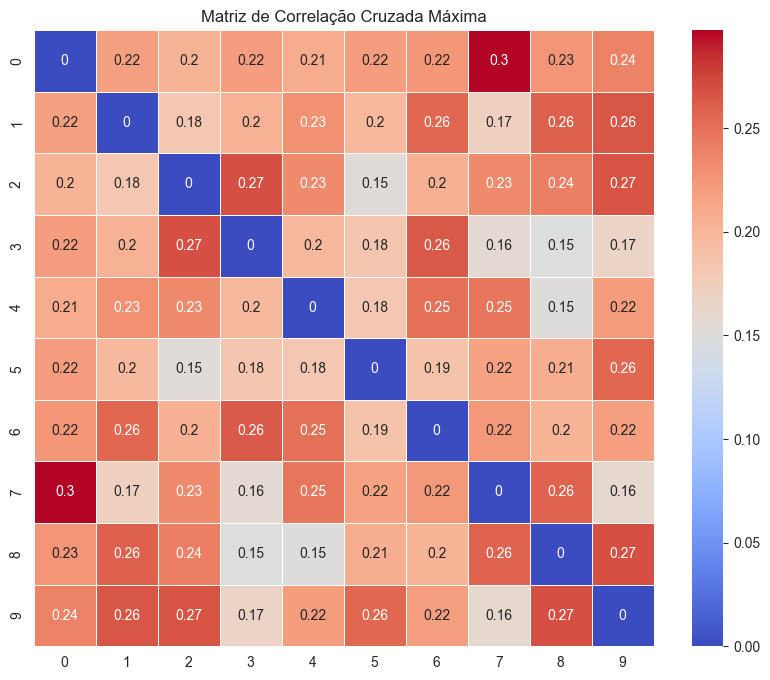

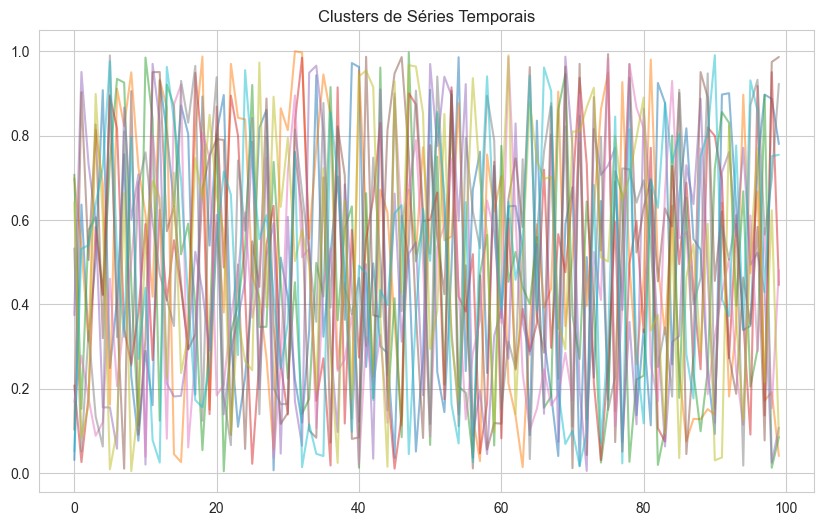

In [10]:
# Gerando dados de exemplo para 10 séries temporais
np.random.seed(42)
time_series_data = np.random.rand(10, 100)

# Calculando a matriz de correlação cruzada máxima
def max_cross_correlation(ts1, ts2):
    correlation = np.correlate(ts1 - np.mean(ts1), ts2 - np.mean(ts2), mode='full')
    return np.max(correlation) / (np.std(ts1) * np.std(ts2) * len(ts1))

correlation_matrix = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        if i != j:
            correlation_matrix[i, j] = max_cross_correlation(time_series_data[i], time_series_data[j])

# Convertendo a matriz de correlação em uma matriz de distância
distance_matrix = 1 - correlation_matrix

# Realizando a clusterização hierárquica
clustering = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='average')
labels = clustering.fit_predict(distance_matrix)

# Plotando o mapa de calor da matriz de correlação cruzada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação Cruzada Máxima')
plt.show()

# Plotando os clusters resultantes
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(time_series_data[labels == i].T, alpha=0.5)
plt.title('Clusters de Séries Temporais')
plt.show()

# Descrevendo os passos necessários
# 1. Gerar dados de exemplo para 10 séries temporais.
# 2. Calcular a matriz de correlação cruzada máxima entre todas as séries temporais.
# 3. Converter a matriz de correlação em uma matriz de distância.
# 4. Realizar a clusterização hierárquica usando a matriz de distância.
# 5. Plotar o mapa de calor da matriz de correlação cruzada.
# 6. Plotar os clusters resultantes.

### Descrevendo os passos necessários

**1. Gerar dados de exemplo para 10 séries temporais**

**2. Calcular a matriz de correlação cruzada máxima entre todas as séries temporais.**

**3. Converter a matriz de correlação em uma matriz de distância.**

**4. Realizar a clusterização hierárquica usando a matriz de distância.**

**5. Plotar o mapa de calor da matriz de correlação cruzada.**

**6. Plotar os clusters resultantes**.

# Escolha do Algoritmo de Clusterização para Séries Temporais

**Para o problema de agrupamento de séries temporais, eu usaria o algoritmo de Clusterização Hierárquica.**
- A clusterização hierárquica é adequada para séries temporais porque permite a criação de uma árvore de dendrograma, que pode ser usada para visualizar a similaridade entre as séries temporais e determinar o número de clusters de forma mais intuitiva.

# Justificativa:
- A clusterização hierárquica não requer a definição prévia do número de clusters, o que é vantajoso quando não se sabe o número exato de grupos.

- Permite a utilização de diferentes métricas de distância, como a correlação cruzada, que é adequada para séries temporais.

- A visualização do dendrograma facilita a interpretação dos resultados e a escolha do número de clusters.

### Caso de Uso para a Solução Projetada

Um caso de uso para a solução de agrupamento de séries temporais é a análise de padrões de consumo de energia elétrica em diferentes regiões. Agrupar séries temporais de consumo de energia pode ajudar a identificar regiões com padrões de consumo semelhantes, permitindo a implementação de estratégias de gerenciamento de energia mais eficazes.

### Outra Estratégia para Medir a Similaridade entre Séries Temporais

**Estratégia**: Distância Dinâmica de Tempo (DTW)

**Passos Necessários**:
1. **Calcular a Distância DTW**:
   - Use a técnica de Distância Dinâmica de Tempo para calcular a similaridade entre pares de séries temporais.
2. **Criar a Matriz de Distância**:
   - Construa uma matriz de distância usando os valores de DTW calculados.
3. **Realizar a Clusterização**:
   - Use a matriz de distância para realizar a clusterização hierárquica ou outro algoritmo de clusterização adequado.
4. **Visualizar os Resultados**:
   - Visualize os clusters resultantes e interprete os padrões identificados.

In [11]:
# Definir o nome do aluno e o nome da disciplina
nome_do_aluno = "Ronaldo Barbosa Resende"
nome_da_disciplina = "Validação de modelos de clusterização"

# Gerar o nome do arquivo PDF
nome_do_arquivo_pdf = f"{nome_do_aluno.replace(' ', '_').lower()}_{nome_da_disciplina.replace(' ', '_').lower()}_pd.pdf"

# Exibir o nome do arquivo PDF
print(nome_do_arquivo_pdf)




ronaldo_barbosa_resende_validação_de_modelos_de_clusterização_pd.pdf
